# Summer of ML | 2021

A 3-week series of workshops and a hackathon covering different topics in the fundamentals of ML.

---

# Workshop 1: Linear Algebra & Probability-Statistics

### Instructor: [Pramit Das](https://www.linkedin.com/in/pramit-das-b1747054/)

In this workshop, we will be covering basic concepts related to the mathematics involved in Machine Learning. 

In the first part, we plan to learn the fundamental uses of Eigen values, matrix factorization and how we use those notions in ML. 
In the second part, we intend to go over some basic statistical distributions and a very simple yet useful technique called Naive Bayes Classification.


## Part 1: Linear Algebra

### **Singular Value Decomposition (SVD)**

In order to extract information from a given matrix, we can use the SVD to obtain 3 arrays which can be multiplied to obtain the original matrix A. From the theory of linear algebra, given a matrix 
, the following product can be computed:

<div align="center">
 $ U\Sigma V^T  = A$
</div>

where U and V are square and $ \Sigma $ is the same size as A. $ \Sigma $ is a diagonal matrix and contains the [singular values](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/eigs.pdf) of A, organized from largest to smallest. These values are always non-negative and can be used as an indicator of the “importance” of some features represented by the matrix  $ \Sigma $ .

The problem of finding matrices U, V and $ \Sigma $ given any matrix A is known as **Singular Value Decomposition**.

---

Numpy provides an easy and effecient function to directly get the singular decomposition of any matrix

In [42]:
import numpy as np

A = np.asarray([[1, 0, 0], [0, 1, 0]])

U, s, Vt = np.linalg.svd(A)

# s is a space efficient representation of the diagonal matrix
# the next 3 lines convert s to the actual matrix Sigma
Sigma = np.zeros((A.shape))
for i in range(s.shape[0]):
    Sigma[i, i] = s[i]


# Ignore -- only to make output 
print("The original matrix is: \n", A)
print("\nThe SVD is: \n", U, "\n * \n", Sigma, "\n * \n", Vt)

The original matrix is: 
 [[1 0 0]
 [0 1 0]]

The SVD is: 
 [[1. 0.]
 [0. 1.]] 
 * 
 [[1. 0. 0.]
 [0. 1. 0.]] 
 * 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [23]:
print("U*Sigma*Vt is: \n", np.matmul(np.matmul(U, Sigma), Vt))

U*Sigma*Vt is: 
 [[1. 0. 0.]
 [0. 1. 0.]]


Note that this is equal to the original matrix A.


### **QR Decomposition**

Any real square matrix A may be decomposed as
$ A=QR$
where Q is an orthogonal matrix meaning $ Q^T = Q^{−1} $ and $ R$ is an upper triangular matrix. 

This is called QR decomposition.

---
Again, getting the QR decomposition is made much simpler by numpy.

In [43]:
import numpy as np

A = np.asarray([[1, 2, 3], [0, 4, 5], [0, 0, 6]])
Q, R = np.linalg.qr(A)


print(Q)
print(R)

# Lets check whether the decomposition matrices are actually correct
print(np.matmul(Q, R))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 2. 3.]
 [0. 4. 5.]
 [0. 0. 6.]]
[[1. 2. 3.]
 [0. 4. 5.]
 [0. 0. 6.]]


Note that Q is orthogonal, R is upper triangular, and Q*R = A

### **Principle Component Analysis (PCA)**

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest

## Part 2: Probability and Statistics

### Gaussian (Normal) Distributions

A Normal Distribution follows the probability density function: 

$ f(x) = (1/ \sigma \sqrt{2\pi})  e ^{(-1/2)((x-\mu)/\sigma)^2} $

where $ \mu$ is the mean of the distribution and $\sigma $ is the standard deviation

In [3]:
import numpy as np

# mean and standard deviation
mu, sigma = 0, 0.1 
s = np.random.normal(mu, sigma, 10000)

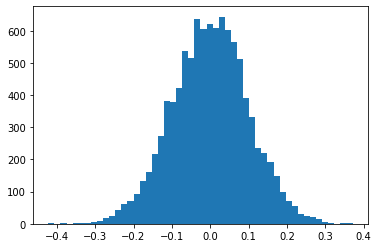

In [4]:
import matplotlib.pyplot as plt

plt.hist(s, bins=50)
plt.show()

Gaussian distribution curve for  10  samples


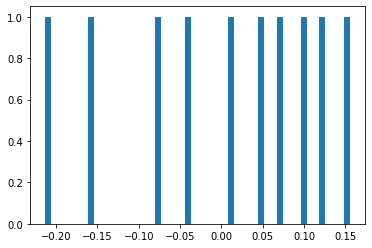

Gaussian distribution curve for  100  samples


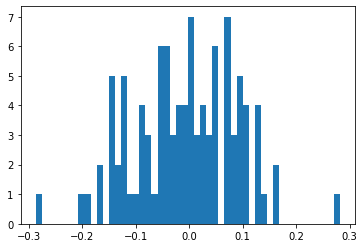

Gaussian distribution curve for  1000  samples


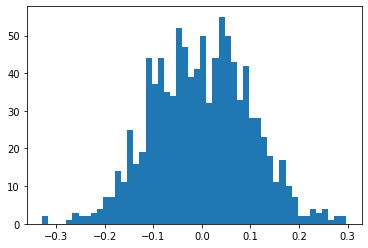

Gaussian distribution curve for  10000  samples


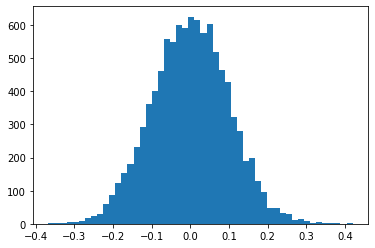

Gaussian distribution curve for  100000  samples


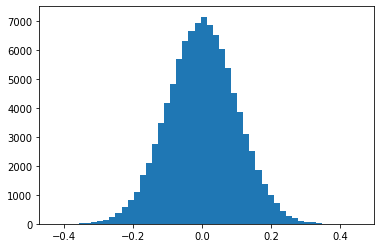

In [7]:
for i in range(1, 6):
    mu, sigma = 0, 0.1 
    s = np.random.normal(mu, sigma, 10**i)

    print("Gaussian distribution curve for ", 10**i, " samples")

    plt.hist(s, bins=50)
    plt.show()

As can be seen above, for small number of samples, the distributions seems random, but as the number of samples increases, a bell-shaped patterns appears

### Poisson Distribution

In [54]:
import numpy as np

lamda = 1000
size = 1000
poisson = np.random.poisson(lam=lamda, size=size)

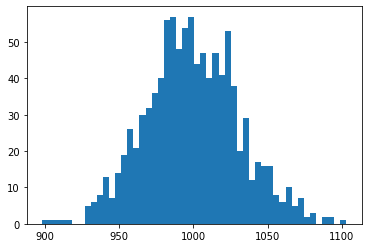

In [55]:
import matplotlib.pyplot as plt

plt.hist(poisson, bins=50)
plt.show()


### Naive Bayes Classifier